In [3]:
%run autoenc_mnist.py --epochs 3 --bottleneck_sizes 128

Batch 1, loss 0.17569772899150848
Batch 101, loss 0.09249911966300246
Batch 201, loss 0.07807432155852294
Batch 301, loss 0.07046871731348608
Batch 401, loss 0.06556472185989864
Batch 501, loss 0.0621074166096851
Batch 601, loss 0.05945707685290875
Batch 701, loss 0.057374993570350884
Batch 801, loss 0.055629942263854426
Batch 901, loss 0.05420395448704671
Batch 1001, loss 0.05300169256511149
Batch 1101, loss 0.05197520927271444
Batch 1201, loss 0.0511029018779331
Batch 1301, loss 0.05032679303724614
Batch 1401, loss 0.04963447365758251
Batch 1501, loss 0.04902059676685308
Batch 1601, loss 0.04847699770242032
Batch 1701, loss 0.04796348709059
Batch 1801, loss 0.04751297591801222
Train epoch 1, loss 0.04720876671075821
Batch 1, loss 0.04092137888073921
Batch 101, loss 0.03921476932297839
Batch 201, loss 0.03917747454263678
Batch 301, loss 0.039109388731444795
Batch 401, loss 0.039062503892510314
Batch 501, loss 0.038963086471824115
Batch 601, loss 0.03892779207095727
Batch 701, loss 0.0

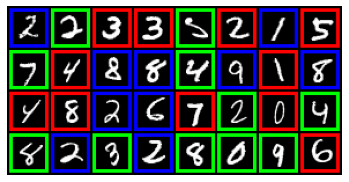

torch.Size([3, 34, 34])

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from col_mnist import ColMNIST

test_loader = torch.utils.data.DataLoader(
  ColMNIST('data/mnist', train=False, download=True, 
                             transform=torchvision.transforms.Compose([#torchvision.transforms.Resize((224, 224)),
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=32, shuffle=True)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
images[0].shape
#print(labels)

In [5]:
train_loader = torch.utils.data.DataLoader(
  ColMNIST('data/mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([#torchvision.transforms.Resize((224, 224)),
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=32, shuffle=True)

labels = []
for _, l in train_loader:
    labels.append(torch.stack(l))
labels = torch.stack(labels)

In [6]:
labels = labels.transpose(1, 2)
labels = labels.reshape(-1, 3)
labels = labels.cpu().numpy()

In [7]:
labels_onehot_digit = np.eye(10)[labels[:, 0]]
labels_onehot_clr1 = np.eye(3)[labels[:, 1]]
labels_onehot_clr2 = np.eye(3)[labels[:, 2]]
np.concatenate([labels_onehot_digit, labels_onehot_clr1], axis=1)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

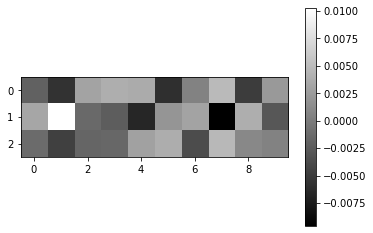

In [53]:
plt.imshow(np.corrcoef(np.concatenate([labels_onehot_digit, labels_onehot_clr1], axis=1), rowvar=False)[10:, :-3])
plt.colorbar()

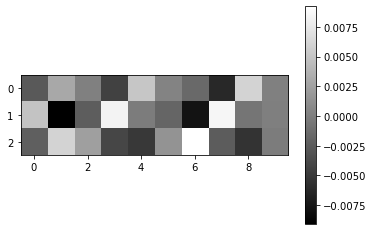

In [54]:
plt.imshow(np.corrcoef(np.concatenate([labels_onehot_digit, labels_onehot_clr2], axis=1), rowvar=False)[10:, :-3])
plt.colorbar()

# Visualizing the reconstruction

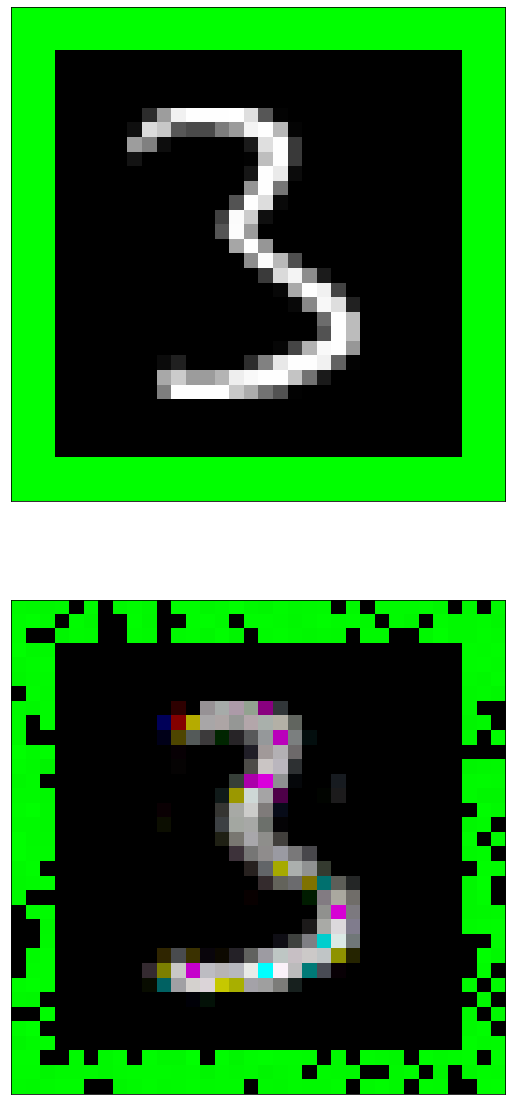

In [10]:
import matplotlib.pyplot as plt

def show_reconstruction():
    with torch.no_grad():
        for batch_features in trainer.test_loader:
            batch_features = batch_features[0]
            test_examples = batch_features.view(-1, np.prod(trainer.input_shape)).to(device)
            reconstruction = trainer.model(test_examples).cpu()
            break

    with torch.no_grad():
        number = 1
        plt.figure(figsize=(20, 20))
        for index in range(number):
            # display original
            ax = plt.subplot(2, number, index + 1)
            plt.imshow(np.transpose(test_examples[index].cpu().numpy().reshape(3, 34, 34), (1, 2, 0)))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # display reconstruction
            ax = plt.subplot(2, number, index + 1 + number)
            plt.imshow(np.clip(np.transpose(reconstruction[index].numpy().reshape(3, 34, 34), (1, 2, 0)), 0, 1))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

show_reconstruction()

Turning off part of the bottleneck

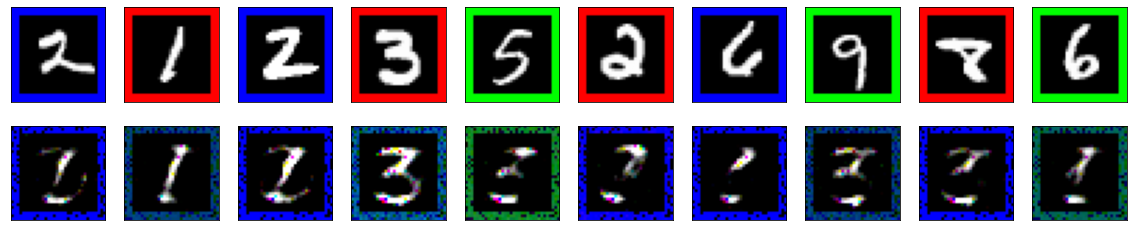

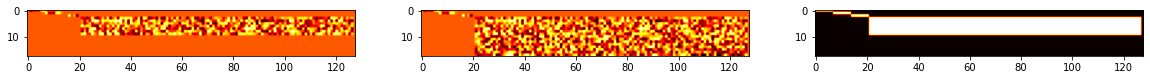

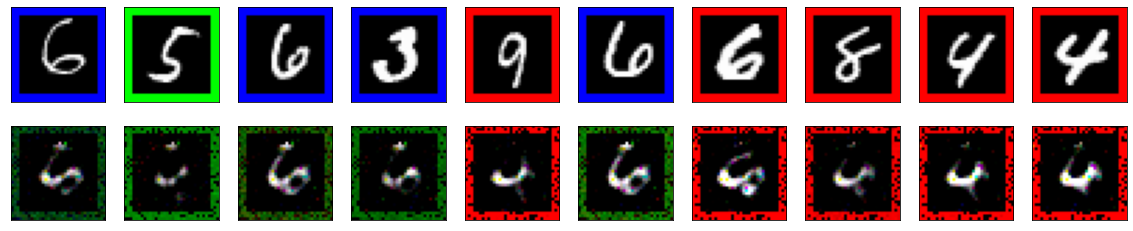

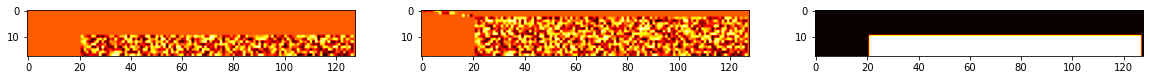

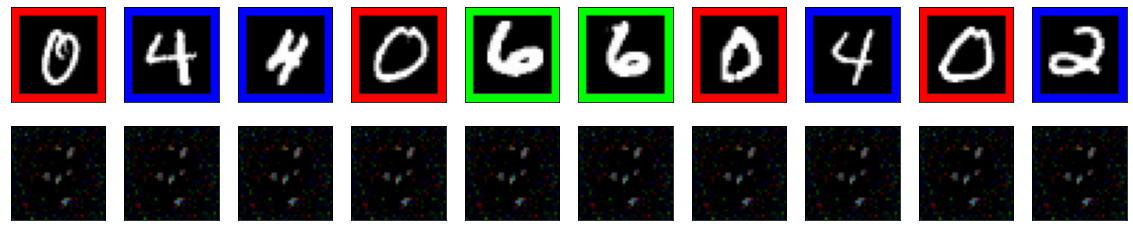

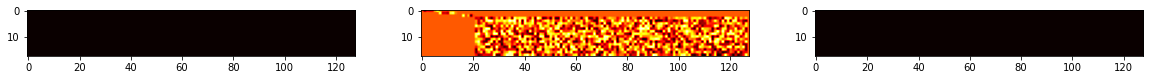

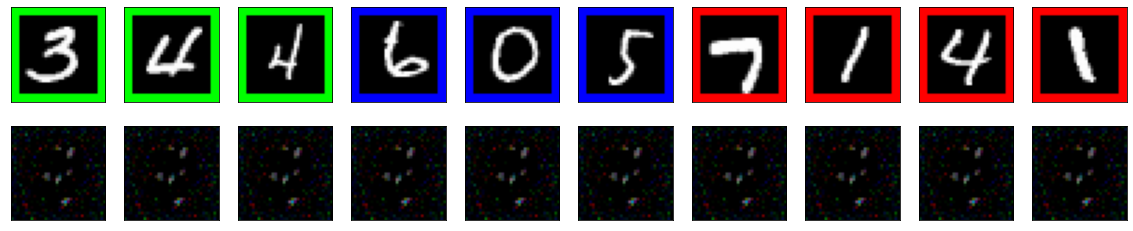

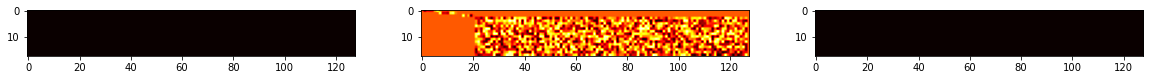

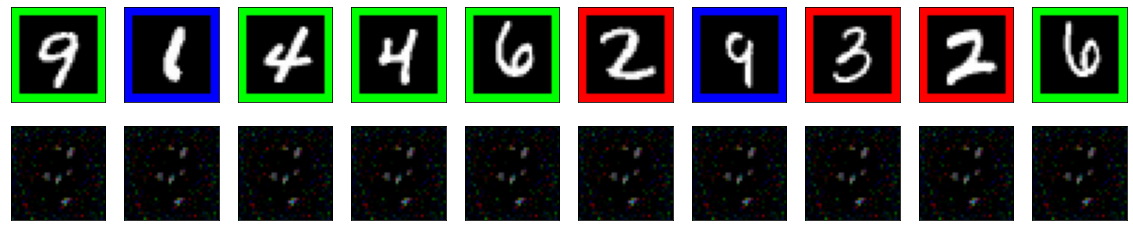

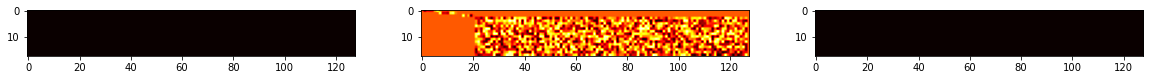

In [41]:
for i in range(0, 50, 10):
    trainer.model.reset_mask()
    mask = trainer.model.original_mask.detach().clone()
    mask[:i] = 0
    mask[i+10:] = 0
    trainer.model.set_mask(mask)
    show_reconstruction()
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    axs[0].imshow(trainer.model.encoder_output_layer.weight.cpu().detach().numpy(), cmap='hot')  
    axs[1].imshow(trainer.model.original_w[0].cpu().detach().numpy(), cmap='hot')
    axs[2].imshow(mask.cpu().detach().numpy(), cmap='hot')


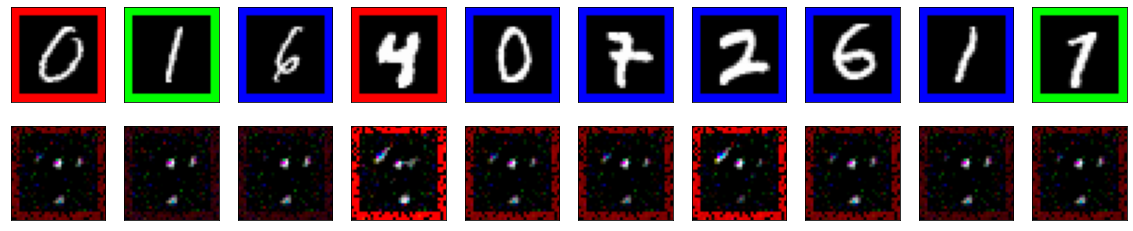

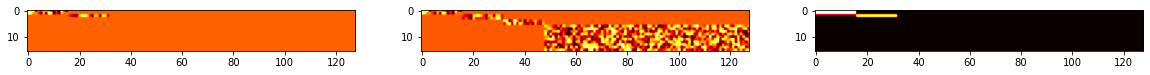

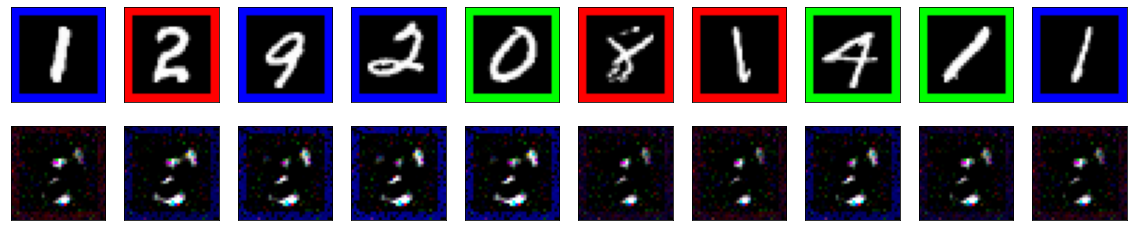

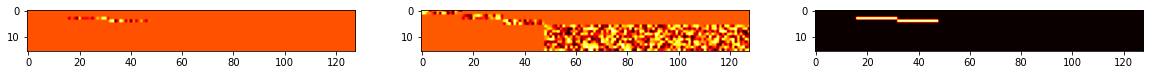

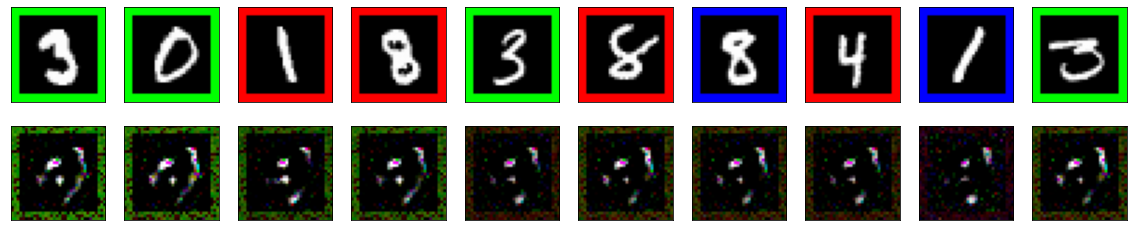

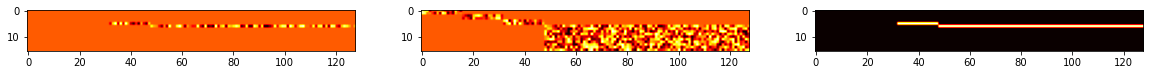

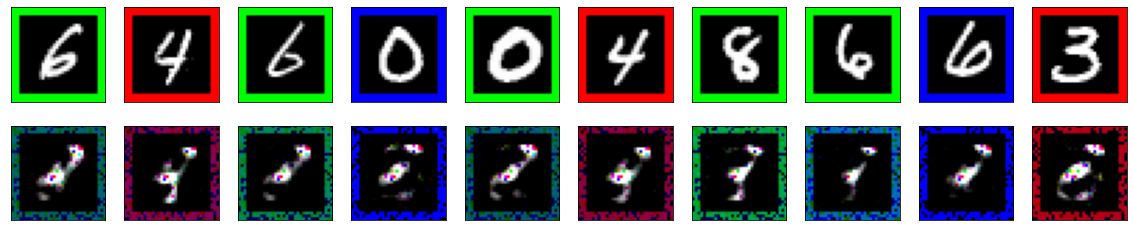

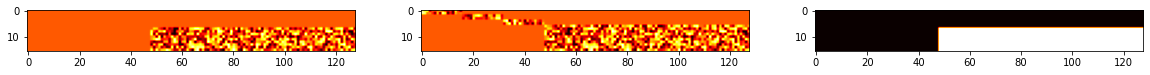

In [56]:
trainer.model.reset_mask()
mask = trainer.model.original_mask.detach().clone()
mask[3:] = 0
trainer.model.set_mask(mask)
show_reconstruction()
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
axs[0].imshow(trainer.model.encoder_output_layer.weight.cpu().detach().numpy(), cmap='hot')  
axs[1].imshow(trainer.model.original_w[0].cpu().detach().numpy(), cmap='hot')
axs[2].imshow(mask.cpu().detach().numpy(), cmap='hot')

trainer.model.reset_mask()
mask = trainer.model.original_mask.detach().clone()
mask[:3] = 0
mask[5:] = 0
trainer.model.set_mask(mask)
show_reconstruction()
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
axs[0].imshow(trainer.model.encoder_output_layer.weight.cpu().detach().numpy(), cmap='hot')  
axs[1].imshow(trainer.model.original_w[0].cpu().detach().numpy(), cmap='hot')
axs[2].imshow(mask.cpu().detach().numpy(), cmap='hot')

trainer.model.reset_mask()
mask = trainer.model.original_mask.detach().clone()
mask[:5] = 0
mask[7:] = 0
trainer.model.set_mask(mask)
show_reconstruction()
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
axs[0].imshow(trainer.model.encoder_output_layer.weight.cpu().detach().numpy(), cmap='hot')  
axs[1].imshow(trainer.model.original_w[0].cpu().detach().numpy(), cmap='hot')
axs[2].imshow(mask.cpu().detach().numpy(), cmap='hot')

trainer.model.reset_mask()
mask = trainer.model.original_mask.detach().clone()
mask[:7] = 0
trainer.model.set_mask(mask)
show_reconstruction()
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
axs[0].imshow(trainer.model.encoder_output_layer.weight.cpu().detach().numpy(), cmap='hot')  
axs[1].imshow(trainer.model.original_w[0].cpu().detach().numpy(), cmap='hot')
axs[2].imshow(mask.cpu().detach().numpy(), cmap='hot')

In [12]:
ae = trainer.model
w1 = ae.encoder_output_layer.weight.cpu().detach().numpy()
w2 = ae.decoder_hidden_layer.weight.cpu().detach().numpy()

In [13]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
graph = np.block([
                 [np.zeros((w1.shape[0], w1.shape[0])), w1],
                 [w1.transpose(),                      np.zeros((w1.shape[1], w1.shape[1]))]])


graph = csr_matrix(np.abs(graph)>0.05)

n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
n_components

21

In [ ]:
import matplotlib.pyplot as plt
plt.hist(w1.flatten())

# Block regularization minimal example

In [ ]:
def laplacian(w):
    m = torch.zeros((sum(w.shape), sum(w.shape)), requires_grad=False)
    m[-w.shape[0]:, :w.shape[1]] = -torch.abs(w)
    m[:w.shape[1]:, -w.shape[0]:] = -torch.abs(w.transpose(-2, -1))
    m -= torch.diag(m.sum(-1))
    return m

In [ ]:
w = torch.tensor([[1, 0], [0, 1], [0, 1]], dtype=torch.float, requires_grad=True)
n_conn_comp = 2
e, _ = torch.symeig(laplacian(w), eigenvectors=True)
loss = torch.sum(e[:n_conn_comp])
loss.backward(retain_graph=True)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(3, 2)

    def forward(self, x):
        x = self.fc(x)
        return x

net = Net()

In [ ]:
net.zero_grad()
n_conn_comp = 2
e, _ = torch.symeig(laplacian(net.fc.weight), eigenvectors=True)
loss = torch.sum(e[:n_conn_comp])
loss.backward(retain_graph=True)

In [ ]:
net.zero_grad()
n_conn_comp = 2
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3)

a = torch.randn((100, 3), dtype=torch.float)
b = torch.vstack((a[:, 0]+a[:, 1], a[:, -1])).transpose(1, 0)

for i in range(0, 1):
    net.zero_grad()
    outputs = net(a)
    e, _ = torch.symeig(laplacian(net.fc.weight), eigenvectors=True)
    mse = criterion(outputs, b)
    #reg = torch.sum(e[:n_conn_comp])
    loss =  mse#+reg
    loss.backward(retain_graph=True)
    optimizer.step()
    
print(mse.item())
net.fc.weight

In [ ]:

w_history = list()
w = torch.tensor([[1, 1, 0], [0, 0, -1]], dtype=torch.float)
w+=torch.rand(2, 3)/10
                 
net.fc.weight=nn.Parameter(w, requires_grad=True)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.1)

print(w)
for i in range(0, 1000):
    net.zero_grad()
    e, _ = torch.symeig(laplacian(net.fc.weight), eigenvectors=True)
    reg = torch.sum(e[:n_conn_comp])
    loss =  reg
    loss.backward(retain_graph=True)
    optimizer.step()
    w_history.append(net.fc.weight.detach().cpu().flatten().numpy())
    
print(reg.item())
net.fc.weight

In [ ]:
import torch
x = -torch.tensor([[1, 1, 0], [0, 0, 1]], dtype=torch.float)
for i in range(1, 10):
    n = torch.rand(x.shape)/i
    l = laplacian(x+n)
    e, _ = torch.symeig(l)
    print(e, torch.sum(e[:2]))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.array(w_history))
plt.show()